<a href="https://colab.research.google.com/github/fadlymuham1/market-segmentation/blob/main/Market_Segmentation_of_Fashion_Online_Shop_Using_K_prototypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries for EDA and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Exploratory Data Analysis and Visualization**

In [2]:
#import data
data = pd.read_csv('/content/drive/MyDrive/Arsip Pendidikan/Python Projects/Market Segmentation/e-shop clothing 2008.csv',sep  = ';')
#source :
#Mariusz ÅapczyÅ„ski, Cracow University of Economics, Poland, lapczynm '@' uek.krakow.pl
#Sylwester BiaÅ‚owÄ…s, Poznan University of Economics and Business, Poland, sylwester.bialowas '@' ue.poznan.pl
#£apczyñski M., Bia³ow¹s S. (2013) Discovering Patterns of Users' Behaviour in an E-shop - 
#Comparison of Consumer Buying Behaviours in Poland and Other European Countries, 
#“Studia Ekonomiczne”, nr 151, “La société de l'information : perspective européenne et 
#globale : les usages et les risques d'Internet pour les citoyens et les consommateurs”, p. 144-
#153.
#https://archive.ics.uci.edu/ml/datasets/clickstream+data+for+online+shopping


In [ ]:
#check data snapshot
data.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [ ]:
#check data snapshot
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [ ]:
data.isnull().sum()

year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64

**Explanation**

The Project aims to create segmentation of visitors on a clothing online store page.

The segmentation is a way of organizing customers into groups with similar traits, products preferences, or expectation.(Rajkumar et al, 2021)

This segmentation is beneficial for the company , so that they could understand the general behaviour of their customer to support the strategic planning of their next marketing campaign e.g Resource allocation.

In addition, the company could adjust itself in term of product offering and the features based on their understanding of segmentation.

bibliography : Marketing Analytics : Essential Tools for Data-Driven Decisions ( Rajkumar Venkatesan et al, 2021)

In [ ]:
data.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [ ]:
#check congent of page 2 clothing model
print(len(data['page 2 (clothing model)'].unique()))

217




*   The data range is from April to August 2008
*   There are 47 different geographical tag (Country),14 colour, 6 location, 2 model pothography
*   Year,month, and day should be dropped as they are not directly connected to traits of customer
*   Session ID and Page 2 (Clothing Model) would be dropped for Segmentation as these the former is Unique ID and the later contains more than 100 category
*   Order column is not needed



In [ ]:
#drop irrelevant fields
coldrop  =['year','month','day','session ID','page 2 (clothing model)','order']
data.drop(coldrop, axis = 1, inplace = True)

In [ ]:
#check the result of drop
data.head()

,country,page 1 (main category),colour,location,model photography,price,price 2,page
0,29,1,1,5,1,28,2,1
1,29,1,1,6,1,33,2,1
2,29,2,10,2,1,52,1,1
3,29,2,6,6,2,38,2,1
4,29,2,4,3,2,52,1,1


In [ ]:
#Check data distribution based on Country
data.groupby('country').agg({'country' :'count'})

,country
country,
1,3
2,58
3,256
4,1
5,4
6,5
7,9
8,1
9,18003


In [ ]:
#simplify country field
data['country_group'] = data['country'].map(lambda x: 'Asia' if (x==20) or (x==40)\
                                      else 'Australia' if (x==1) or (x==6)\
                                      else 'Caribbean' if (x==4) or (x==5)\
                                      else 'Central Europe' if (x==2) or (x==9) or (x==18) or (x==29) or (x==34) or (x==38)\
                                      else 'East Europe' if (x==11) or (x==23) or (x==24) or (x==32) or (x==39)\
                                      else 'Nordic' if (x==10) or (x==13) or (x==14) or (x==19) or (x==28) or (x==37) \
                                      else 'North America' if (x==26) or (x==42)\
                                      else 'South Europe' if (x==22) or (x==33)\
                                      else 'Southeast Europe' if (x==7) or (x==8) or (x==17) or (x==31) or (x==35) \
                                      else 'Western Europe' if (x==3) or (x==15) or (x==16) or (x==21) or (x==25) or (x==27) or (x==30) or (x==36) or ( x==41)\
                                      else 'Unidentified')  

In [ ]:
#display country distribution
data[['country_group','country']].value_counts(normalize = True, ascending= False)

country_group     country
Central Europe    29         0.809571
                  9          0.108797
East Europe       24         0.024723
Unidentified      46         0.015241
                  44         0.008370
Western Europe    16         0.005040
                  21         0.004901
Central Europe    34         0.004327
Western Europe    41         0.004134
                  3          0.001547
                  27         0.001372
Unidentified      12         0.001269
North America     42         0.001027
Nordic            37         0.000985
                  10         0.000919
South Europe      22         0.000870
Southeast Europe  31         0.000870
Nordic            28         0.000840
Central Europe    38         0.000828
Western Europe    15         0.000755
East Europe       11         0.000695
Western Europe    25         0.000429
Central Europe    2          0.000351
East Europe       32         0.000296
                  23         0.000278
Nordic            14    

In [ ]:
#display country Absolute count Distribution
data[['country_group','country']].value_counts(normalize = False, ascending= False)

country_group     country
Central Europe    29         133963
                  9           18003
East Europe       24           4091
Unidentified      46           2522
                  44           1385
Western Europe    16            834
                  21            811
Central Europe    34            716
Western Europe    41            684
                  3             256
                  27            227
Unidentified      12            210
North America     42            170
Nordic            37            163
                  10            152
South Europe      22            144
Southeast Europe  31            144
Nordic            28            139
Central Europe    38            137
Western Europe    15            125
East Europe       11            115
Western Europe    25             71
Central Europe    2              58
East Europe       32             49
                  23             46
Nordic            14             43
East Europe       39             34
Un

90% Of visitors are coming from 2 countries:
1.   Poland (29)
2.   Czech Republic (9)

People from different geographical locations may have difference behaviour of purchasing. Thus, to prevent wrong conclusion, I drop visitors data from countries outside Poland and Czech  Republic

In [ ]:
#Keep only Poland And Czech Data
data = data[(data['country']== 29) | (data['country']== 9)]

In [ ]:
#Check Result
data[['country_group','country']].value_counts(normalize = False, ascending= False)

country_group   country
Central Europe  29         133963
                9           18003
dtype: int64

In [ ]:
data.head()

,country,page 1 (main category),colour,location,model photography,price,price 2,page,country_group
0,29,1,1,5,1,28,2,1,Central Europe
1,29,1,1,6,1,33,2,1,Central Europe
2,29,2,10,2,1,52,1,1,Central Europe
3,29,2,6,6,2,38,2,1,Central Europe
4,29,2,4,3,2,52,1,1,Central Europe


In [ ]:
#Check if there is any missing data in any column
data.isna().sum()

country                   0
page 1 (main category)    0
colour                    0
location                  0
model photography         0
price                     0
price 2                   0
page                      0
country_group             0
dtype: int64

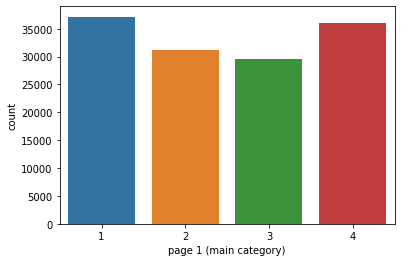

In [ ]:
#visualize page 1 visit distribution for poland
data_poland =data[data['country'] == 29].copy()
data_poland['page 1 (main category)'] = data_poland['page 1 (main category)'].astype('int')
data_poland['count']= 1
data_poland = data_poland.groupby('page 1 (main category)').agg({'count':np.sum}).reset_index()
sns.barplot(data = data_poland,x ='page 1 (main category)',y = 'count',order =[1,2,3,4]) 

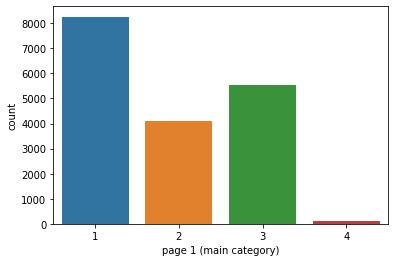

In [ ]:
#visualize page 1 visit distribution for czech
data_czech =data[data['country'] == 9].copy()
data_czech['page 1 (main category)'] = data_czech['page 1 (main category)'].astype('int')
data_czech['count']= 1
data_czech = data_czech.groupby('page 1 (main category)').agg({'count':np.sum}).reset_index()
sns.barplot(data = data_czech,x ='page 1 (main category)',y = 'count',order =[1,2,3,4])

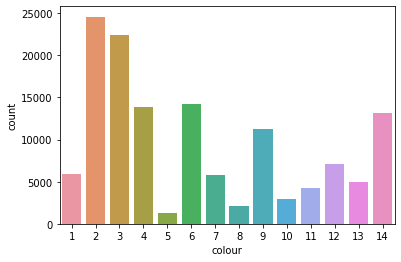

In [ ]:
#visualize item color distribution for poland
color_poland =data[data['country'] == 29].copy()
color_poland['count']= 1
color_poland = color_poland.groupby('colour').agg({'count':np.sum}).reset_index()
sns.barplot(data = color_poland,x ='colour',y = 'count') 

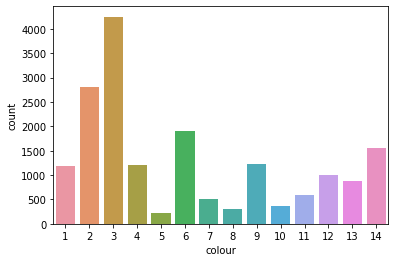

In [ ]:
#visualize item color distribution for czech
color_czech=data[data['country'] == 9].copy()
color_czech['count']= 1
color_czech = color_czech.groupby('colour').agg({'count':np.sum}).reset_index()
sns.barplot(data = color_czech,x ='colour',y = 'count') 

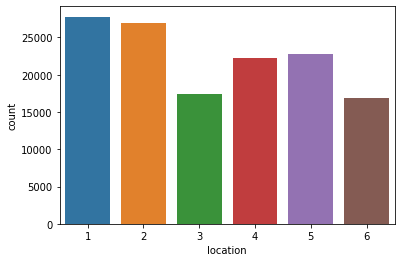

In [ ]:
#visualize location distribution for Poland
loc_poland =data[data['country'] == 29].copy()
loc_poland['count']= 1
loc_poland = loc_poland.groupby(['location']).agg({'count':np.sum}).reset_index()
sns.barplot(data = loc_poland,x ='location',y = 'count') 

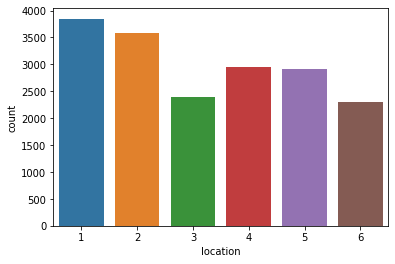

In [ ]:
#visualize location distribution for Czech
loc_czech =data[data['country'] == 9].copy()
loc_czech['count']= 1
loc_czech = loc_czech.groupby('location').agg({'count':np.sum}).reset_index()
sns.barplot(data = loc_czech,x ='location',y = 'count') 

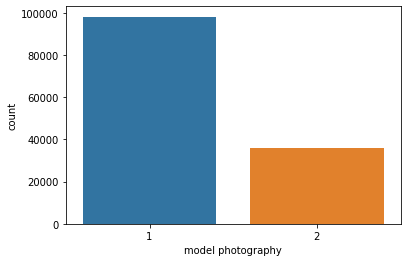

In [ ]:
#visualize model photography for poland
mod_poland =data[data['country'] == 29].copy()
mod_poland['count']= 1
mod_poland = mod_poland.groupby(['model photography']).agg({'count':np.sum}).reset_index()
sns.barplot(data = mod_poland,x ='model photography',y = 'count') 

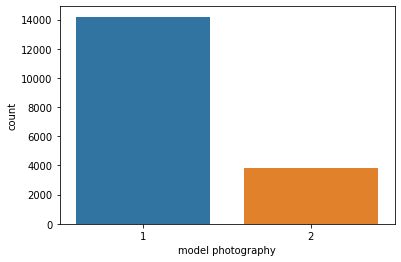

In [ ]:
#visualize model photography for czech
mod_czech =data[data['country'] == 9].copy()
mod_czech['count']= 1
mod_czech = mod_czech.groupby(['model photography']).agg({'count':np.sum}).reset_index()
sns.barplot(data = mod_czech,x ='model photography',y = 'count') 

In [ ]:
#average price ITEM Poland(29) VS Czech(9)
data.groupby('country').agg({'price':'mean'}).reset_index()

,country,price
0,9,45.921346
1,29,43.470593


In [ ]:
#median price ITEM Poland(29) VS Czech(9)
data.groupby('country').agg({'price':'median'}).reset_index()

,country,price
0,9,43.0
1,29,43.0


In [ ]:
#proportion of premium ITEM Poland(29) VS Czech(9)
data['premium'] = data['price 2'].map(lambda x:1 if x == 1 else 0)
data.groupby('country').agg({'premium':'mean'}).reset_index()

,country,premium
0,9,0.485308
1,29,0.514866


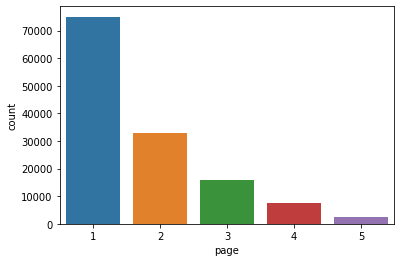

In [ ]:
#visualize page distribution for poland ( in page xx the item is located)
pg_poland =data[data['country'] == 29].copy()
pg_poland['count']= 1
pg_poland= pg_poland.groupby(['page']).agg({'count':np.sum}).reset_index()
sns.barplot(data = pg_poland,x ='page',y = 'count') 

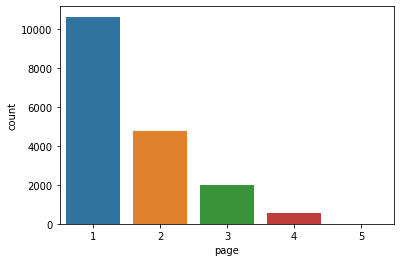

In [ ]:
#visualize page distribution for poland
pg_czech =data[data['country'] == 9].copy()
pg_czech['count']= 1
pg_czech= pg_czech.groupby(['page']).agg({'count':np.sum}).reset_index()
sns.barplot(data = pg_czech,x ='page',y = 'count') 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151966 entries, 0 to 165470
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   country                 151966 non-null  int64 
 1   page 1 (main category)  151966 non-null  int64 
 2   colour                  151966 non-null  int64 
 3   location                151966 non-null  int64 
 4   model photography       151966 non-null  int64 
 5   price                   151966 non-null  int64 
 6   price 2                 151966 non-null  int64 
 7   page                    151966 non-null  int64 
 8   country_group           151966 non-null  object
 9   premium                 151966 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 12.8+ MB


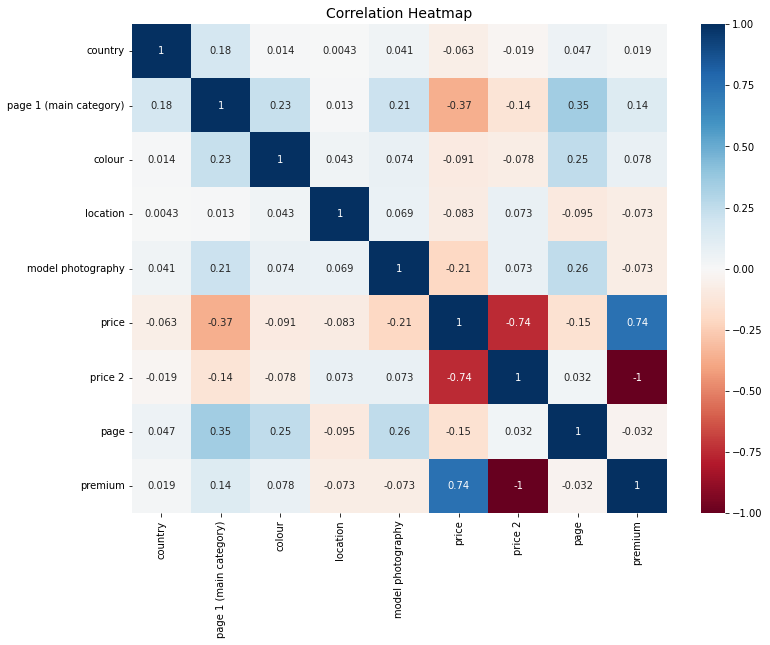

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()



1.   Both Poland and Czech are in favor to access category 1 (trousers), yet for the other categories they tend to differ
2.   Both Poland and Czech have similar colour choice distribution, but the most popular colour for poland is colour 2 (Black) while Czech is colour 3 (Blue)
3.   Preference towards photo location of the page is similar for both Poland and czech with location 1 item (top left) has the most visitors
4.   Poland visitors tend to view profile picture more than czech visitors, yet both have much more preference toward en-face pictures
5.   Poland and czech visitors purchase similar price ranges item (43 Euro per piece), yet more poland visitor purchases pay more premium prices (51% of all purchases) compared to czech visitors (48%)
6.   Price and Price 2 Variables are highly correlated (-74%) , yet no variable need need to be dropped as Kmean is not badly affected by collinearity/correlatin.
7.   The aforementioned correlation could be define as : The higher the absolute price, the lower the relative price compared to other items in the same category

8.   Kmean cannot be used as there are some categorical variables, Kmode also cannot be used as there are some numerical variables. Best approach : K-Prototypes



## **Data Standardization and Modelling**

In [ ]:
# pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import libraries for Data Standardization and Modelling
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes

In [ ]:
#drop unused columns (country group is not used while Price 2 has been transformed into 'premium' column)
unused  = ['country_group','price 2']
data = data.drop(unused, axis= 1)

In [ ]:
#standardize the numerical column
data_model = data.copy()
scaler_num = StandardScaler()
data_model['price'] = scaler_num.fit_transform(data_model[['price']])


In [ ]:
# Get the position of categorical columns
list_cat = ['country','page 1 (main category)','colour','location',
             'model photography','page','premium']
catColumnsPos = [data_model.columns.get_loc(col) for col in list_cat]
print('Categorical columns           : {}'.format(list_cat))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['country', 'page 1 (main category)', 'colour', 'location', 'model photography', 'page', 'premium']
Categorical columns position  : [0, 1, 2, 3, 4, 6, 7]


In [ ]:
data_model.head()

,country,page 1 (main category),colour,location,model photography,price,page,premium
0,29,1,1,5,1,-1.257170,1,0
1,29,1,1,6,1,-0.858345,1,0
2,29,2,10,2,1,0.657190,1,1
3,29,2,6,6,2,-0.459520,1,0
4,29,2,4,3,2,0.657190,1,1


In [ ]:
kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(data_model, categorical=catColumnsPos )
#join data with labels 
labels = pd.DataFrame(clusters)
labeleddata = pd.concat((data_model,labels),axis=1)
labeleddata = labeleddata.rename({0:'labels'},axis=1)

In [ ]:
labeleddata.to_csv('result_clustering.csv')

In [4]:
labeleddata = pd.read_csv('/content/drive/MyDrive/Arsip Pendidikan/Python Projects/Market Segmentation/result_clustering.csv')

In [5]:
labeleddata.head()

,Unnamed: 0,country,page 1 (main category),colour,location,model photography,price,page,premium,labels
0,0,29.0,1.0,1.0,5.0,1.0,-1.257170,1.0,0.0,0.0
1,1,29.0,1.0,1.0,6.0,1.0,-0.858345,1.0,0.0,0.0
2,2,29.0,2.0,10.0,2.0,1.0,0.657190,1.0,1.0,1.0
3,3,29.0,2.0,6.0,6.0,2.0,-0.459520,1.0,0.0,0.0
4,4,29.0,2.0,4.0,3.0,2.0,0.657190,1.0,1.0,1.0


In [6]:
labeleddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164570 entries, 0 to 164569
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              164570 non-null  int64  
 1   country                 151966 non-null  float64
 2   page 1 (main category)  151966 non-null  float64
 3   colour                  151966 non-null  float64
 4   location                151966 non-null  float64
 5   model photography       151966 non-null  float64
 6   price                   151966 non-null  float64
 7   page                    151966 non-null  float64
 8   premium                 151966 non-null  float64
 9   labels                  151966 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 12.6 MB


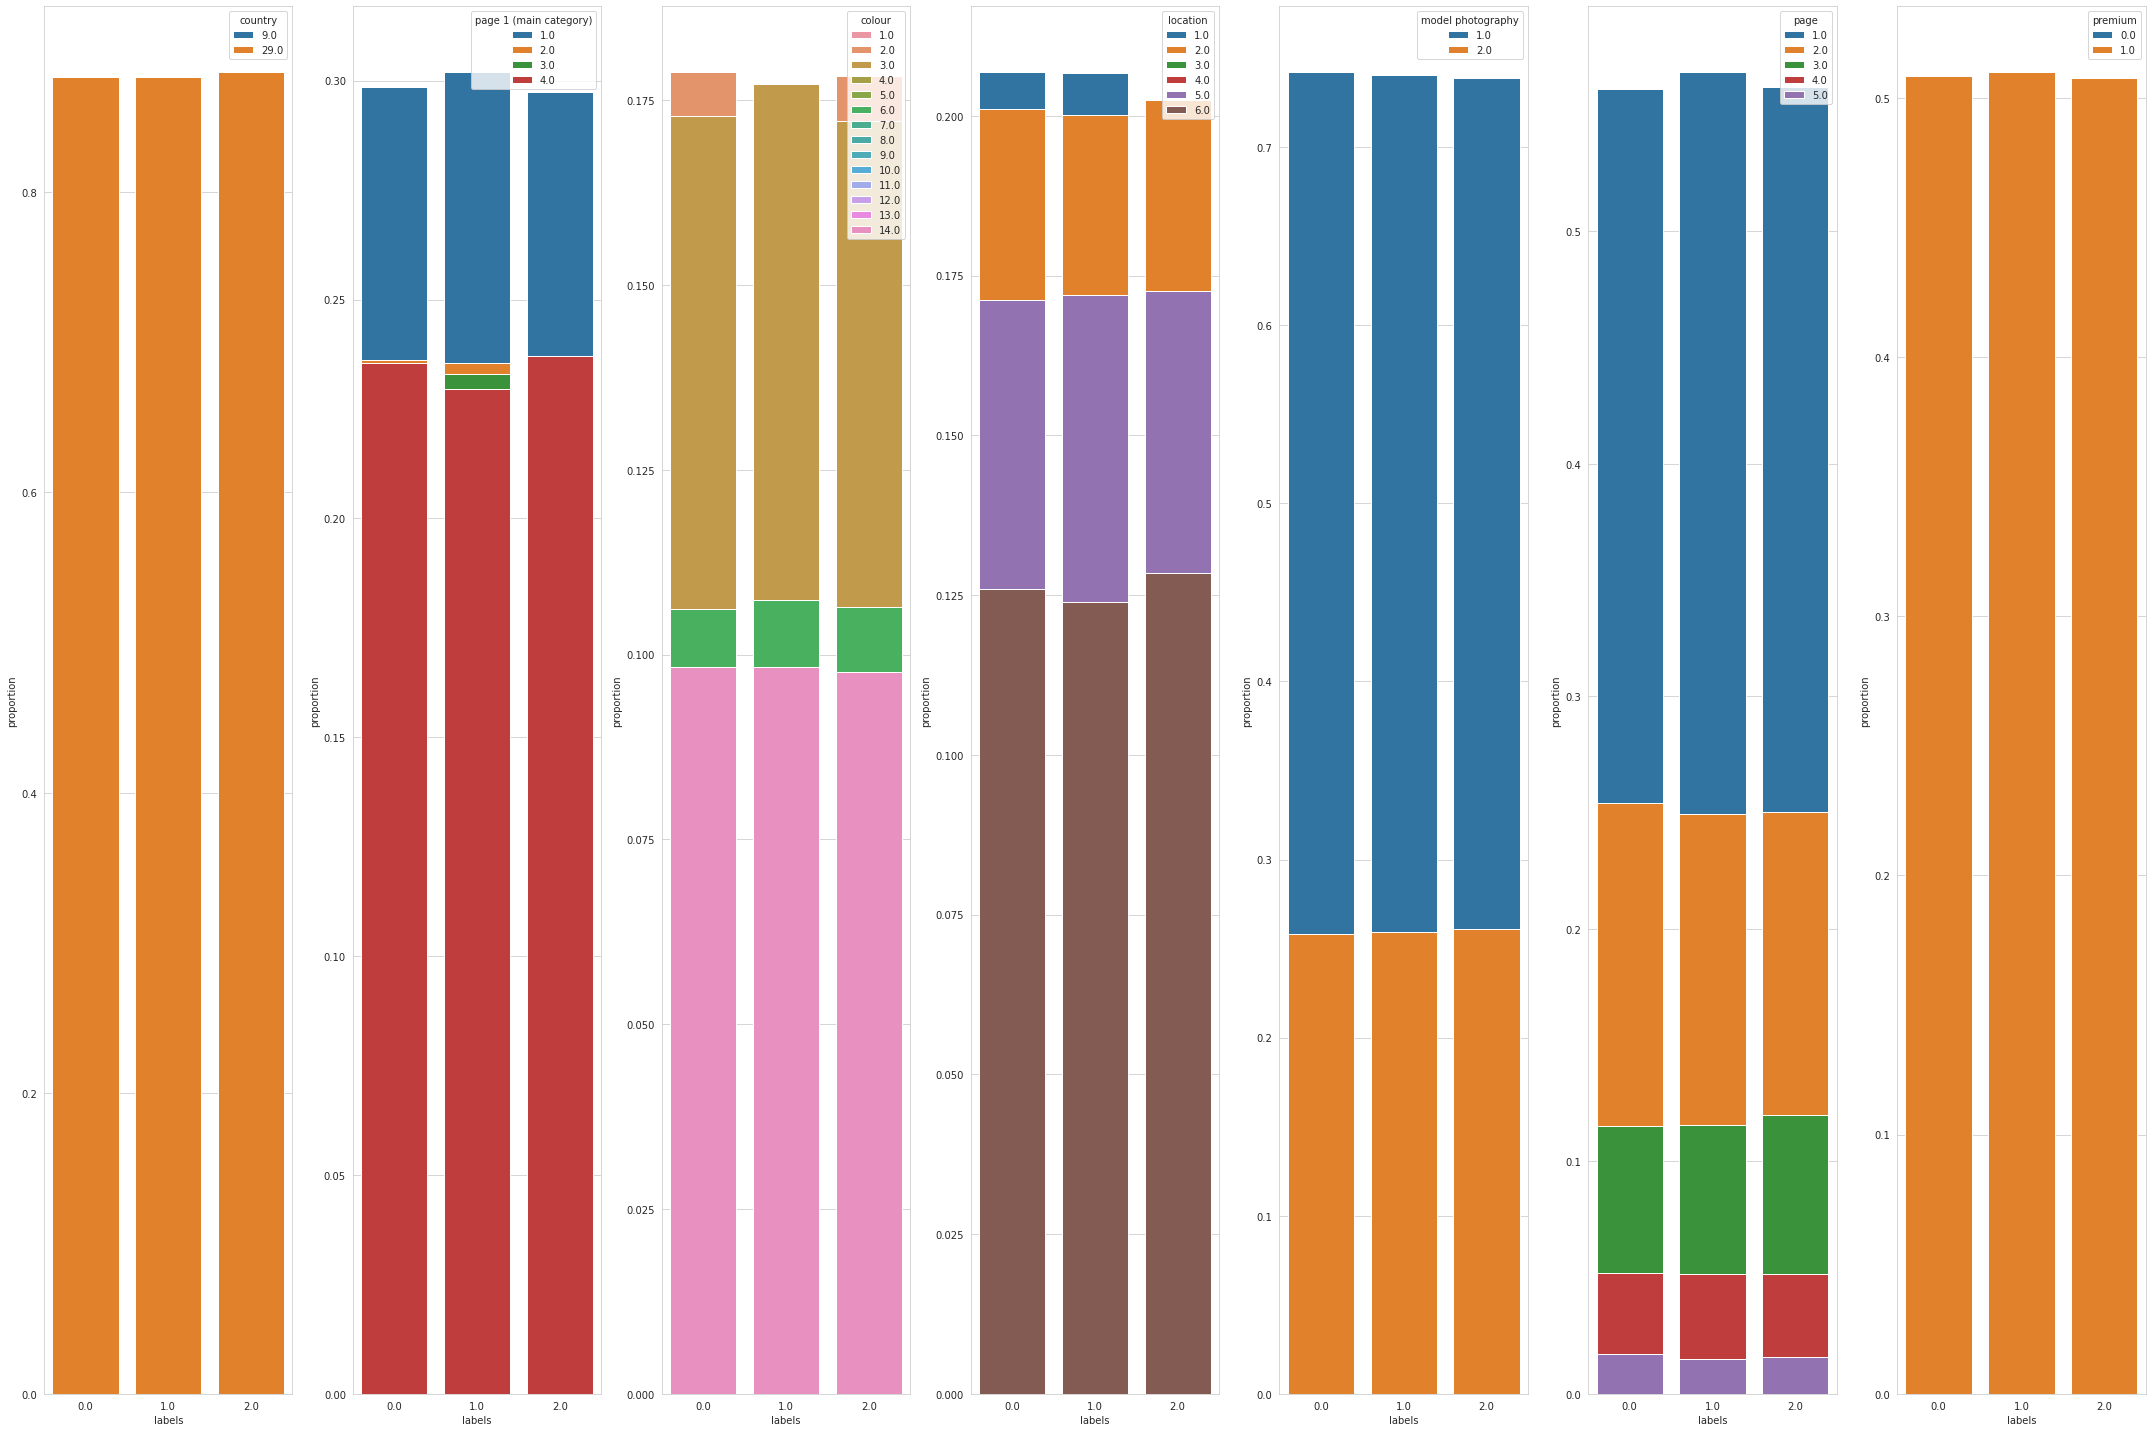

In [35]:
x_columns = list(labeleddata.drop(columns = ['labels',"Unnamed: 0","price" ]).columns)
# x_columns
# Create a figure with the number of subplots equal to the number of x columns
fig, ax = plt.subplots(1, len(x_columns), figsize=(30, 20))

# # Loop over the x columns
for i, x_column in enumerate(x_columns):
#     # Plot the x column against the y variable (tip) in the corresponding subplot
    grouped =labeleddata.groupby(['labels', x_column]).size().reset_index(name='counts')
    grouped['proportion'] = grouped.groupby('labels')['counts'].apply(lambda x: x / x.sum())

    # Plot the stacked bar plot
    sns.barplot(x='labels', y='proportion', hue=x_column, data=grouped, dodge=False,ax = ax[i])
# # Show the plot
plt.tight_layout()
plt.show()

In [36]:
labeleddata.groupby('labels')['price'].mean()

labels
0.0   -0.002241
1.0   -0.000480
2.0   -0.009516
Name: price, dtype: float64


**Conclusion**
*   Country-wise, since most of populations comes from poland, cannot be differentiated between clusters
*   Second Cluster (Label = 2) tend to open other categories more instead of sticking with the trouser and sale products
*  Second cluster tend to not clicking item with beige color, whule the first and third cluster sometimes choose the color. Second cluster likes the gray color instead
* Third cluster almost never choose item that is located at the top left, but most likely to choose items at the bottom right compared to other clusters
*   All cluster have similar behavior in terms of page opened, less of them will open the next pages.
*   All clusters tend to prefer towards model 1 in term of model choices, but we need to make sure if there are actually equal option of items between model 1 and model 2
*   All cluster tend to not choosing items with above average prices
*   But, third cluster seems to be choosing more pricey items





